<a href="https://colab.research.google.com/github/Michael-Holland-Dev/CS180/blob/main/data_science_labs/data_science_lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BYU CS 180 Lab 3

In [1]:
import pandas as pd
import numpy as np

## Introduction:
Welcome to your first pandas lab!

Much of this lab has been adapted from this [link](https://acme.byu.edu/0000017c-ccff-da17-a5fd-cdff03a50000/acmefiles-09-pandas1-2021-pdf) pandas introduction lab from the ACME major. Feel free to read through it and use it as you complete this lab.

Lab Objective:

The goal of this lab is for you to become more comfortable in Python's pandas library. We'll introduce you to pandas data structures, syntax, and powerful capacity.

### Important Hints
Notice that most of the functions we learn about in this lab return new values. In order to save these values, we must store them.

For example, df.drop(columns=['column1']) will drop the column1 from df, but we must call df = df.drop(columns=['column1']) to store the changed dataframe.

#### Series:
The following cell creates a pandas series, which is essentially a list with an index for each entry in the list. The index is generally used as a label for the data.

In [2]:
math = pd.Series([80,96,78,59],['Mark','Barbara','Eleanor','David'])
print(math)

Mark       80
Barbara    96
Eleanor    78
David      59
dtype: int64


Notice that each element in the above series 'math' is a number 1-100, and each of these elements are labeled with a name. The dtype (data type) of this series is an int64. Let's say these numbers represent each student's grade in their math class.

## Exercise 1: Pandas Series

Create a pandas series of type int64 called 'english' storing our four student's english grades:

Mark -> 90

Barbara -> 87

Eleanor -> 97

David -> 65

In [3]:
#Create a pandas series below:
english = pd.Series([90,87,97,65],['Mark','Barbara','Eleanor','David'])
print(english)

Mark       90
Barbara    87
Eleanor    97
David      65
dtype: int64


**DataFrame**

The next, and most important, data structure in pandas is the DataFrame. A DataFrame is a collection of multiple Series objects, and it is essentially a 2d array/list with each row labeled by an index, and each column labeled as a column.

Below we initialize a DataFrame, 'simple_grades', using the 'math' and 'english' Series that we created above.

In [4]:
simple_grades = pd.DataFrame({"Math": math, "English": english})
print(simple_grades)

         Math  English
Mark       80       90
Barbara    96       87
Eleanor    78       97
David      59       65


Notice that we now have numbers that are labelled twice. Mark's English grade is an 90. Eleanor's Math grade is a 78.

We can also initialize a DataFame using a NumPy array, since pandas is built on top of NumPy. We do that below and call it 'grades'.

In [5]:
data = np.array([[52.0, 73.0], [10.0, 39.0], [35.0, np.nan], [np.nan, 26.0],[np.nan,99.0],[81.0,68.0]])
grades = pd.DataFrame(data, columns = ['Math', 'English'], index = ['Barbara','David','Eleanor','Greg','Lauren','Mark'])
grades

,Math,English
Barbara,52.0,73.0
David,10.0,39.0
Eleanor,35.0,NaN
Greg,NaN,26.0
Lauren,NaN,99.0
Mark,81.0,68.0


In [6]:
# look at the column labels of grades
print(grades.columns)
# look at the index labels of grades
print(grades.index)
# look at the values (2d array) of grades
print(grades.values)

Index(['Math', 'English'], dtype='object')
Index(['Barbara', 'David', 'Eleanor', 'Greg', 'Lauren', 'Mark'], dtype='object')
[[52. 73.]
 [10. 39.]
 [35. nan]
 [nan 26.]
 [nan 99.]
 [81. 68.]]


## Exercise 2:
To access data in a DataFrame, we use the .loc and the .iloc indexers.

The .loc index selects rows and columns based on their labels


In [7]:
grades.loc[['David','Greg'],'Math']

David    10.0
Greg      NaN
Name: Math, dtype: float64

Where the .iloc selects rows and columns based on their integer position

In [8]:
grades.iloc[[1,3],0]

David    10.0
Greg      NaN
Name: Math, dtype: float64

Use `.loc` to print Eleanor and Mark's grades in both English and Math

In [9]:
#Enter the code here to print both Eleanor and Marks Grades
grades.loc[['Eleanor','Mark']]

,Math,English
Eleanor,35.0,NaN
Mark,81.0,68.0


You can also access an entire column of a DataFrame by using simple square brackets and the name of the column.

In [10]:
grades['Math']

Barbara    52.0
David      10.0
Eleanor    35.0
Greg        NaN
Lauren      NaN
Mark       81.0
Name: Math, dtype: float64

Using the same logic, we can also create a new column using either a numpy array, a list, or a single value. 

In [11]:
grades['History'] = np.random.randint(0,100,6)
grades['History'] = 100

To view the beginning of a DataFrame, we can use .head(n). This makes it a lot easier to get an idea of what the data look like without printing the entire dataframe (especially when the df is huge!).

In [12]:
grades.head(3)

,Math,English,History
Barbara,52.0,73.0,100
David,10.0,39.0,100
Eleanor,35.0,NaN,100


You can also use .reindex to change the order of either the rows or columns, and .sort_values to sort the DataFrame by a specified column value.

In [13]:
grades.reindex(columns=['English','Math','History'])
grades.sort_values('Math',ascending=False)

,Math,English,History
Mark,81.0,68.0,100
Barbara,52.0,73.0,100
Eleanor,35.0,NaN,100
David,10.0,39.0,100
Greg,NaN,26.0,100
Lauren,NaN,99.0,100


You can also drop columns from a dataframe by using df.drop(columns=[])

In [14]:
grades.drop(columns=['Math'])

,English,History
Barbara,73.0,100
David,39.0,100
Eleanor,NaN,100
Greg,26.0,100
Lauren,99.0,100
Mark,68.0,100


## Exercise 3: Girlfriend Vs. Fortnite
The costs.csv downloaded earlier contains an estimate of my costs over the past few semesters. You get to help me!
* Read in the costs.csv file
* Add a column called 'girlfriend' with all values set to 500
* Reindex the columns such that the amount spent on rent is the first column and the other columns stay in the same order
* Sort the DataFrame in descending order based on how much I spent on fortnite_skins
* Reset all the values in the rent column to 1000

In [1]:
#Girl Friend Data
# !curl -o costs.csv https://raw.githubusercontent.com/wingated/cs180_labs/main/costs.csv
!curl -o star_stats.csv https://raw.githubusercontent.com/porterjenkins/CS180/main/data/midterm/star_stats.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10863  100 10863    0     0  45042      0 --:--:-- --:--:-- --:--:-- 45262


In [7]:
!curl -o 2015-PM2.5.csv https://airmonitoring.utah.gov/dataarchive/2015-PM2.5.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  522k  100  522k    0     0  2095k      0 --:--:-- --:--:-- --:--:-- 2091k


In [4]:
import pandas as pd
data = pd.read_csv("2015-PM2.5.csv", index_col = 'Unnamed: 0')[2:]
data

,BR,BV,ED,H3,HA,HC,HW,L4,LN,NP,O2,RS,SM,T3,V4
1/1/2015 0:00,2.2,22.6,NaN,NaN,26.8,4.8,NaN,19.2,23.9,19.2,14.9,10,NaN,8.3,NaN
1/1/2015 1:00,3.9,18.7,NaN,NaN,31.7,4.7,NaN,22.7,28.1,21.7,24.2,12,NaN,4.9,NaN
1/1/2015 2:00,3.2,14.1,NaN,NaN,29.8,4.9,NaN,23.9,25.8,19.3,12.2,12,NaN,2.9,NaN
1/1/2015 3:00,2.4,12.8,NaN,NaN,23.3,7,NaN,29.5,17.6,15.1,10.5,10.4,NaN,3.5,NaN
1/1/2015 4:00,1.4,14,NaN,NaN,24.9,3.8,NaN,17.3,14.4,12.8,13.9,10,NaN,2.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/31/2015 19:00,10.3,13.9,NaN,17.6,15.8,6.4,16.4,NaN,23.5,25.3,16.5,12.9,15.6,14.4,16.6
12/31/2015 20:00,4.3,15,NaN,16.9,19.5,6.5,21.2,NaN,29.5,26.2,20,12,NaN,9.9,13.4
12/31/2015 21:00,12.7,10.5,NaN,10.1,17.9,6.1,22.3,NaN,25.4,26,18.6,11.6,NaN,5.2,10.4
12/31/2015 22:00,9.8,11.1,NaN,6.7,15.6,6.6,20.3,NaN,27,18.9,20.9,12.2,NaN,4.6,10.3


In [6]:
#(i)Clean up the data
data = data[['NP']].fillna(method='ffill')
data['NP'] = data['NP'].astype(float)
data[data<0] = 0
data['NP'].unique()
data

,NP
1/1/2015 0:00,19.2
1/1/2015 1:00,21.7
1/1/2015 2:00,19.3
1/1/2015 3:00,15.1
1/1/2015 4:00,12.8
...,...
12/31/2015 19:00,25.3
12/31/2015 20:00,26.2
12/31/2015 21:00,26.0
12/31/2015 22:00,18.9


,NP
1/1/2015 0:00,19.2
1/1/2015 1:00,21.7
1/1/2015 2:00,19.3
1/1/2015 3:00,15.1
1/1/2015 4:00,12.8
...,...
12/31/2015 19:00,25.3
12/31/2015 20:00,26.2
12/31/2015 21:00,26.0
12/31/2015 22:00,18.9


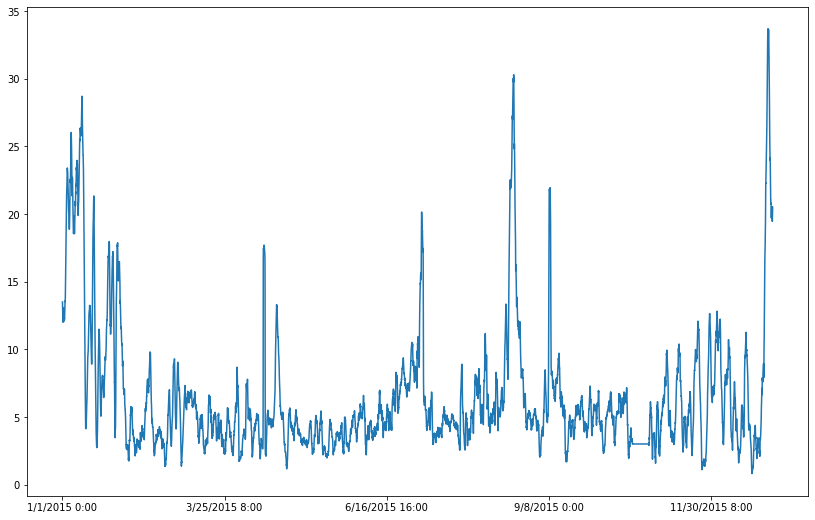

In [9]:
#(ii)-(a) Estimate the trend with a symmetric
data['NP'].rolling(window=24, min_periods = 1, center=True).mean().plot(figsize=(14, 9))
data

<AxesSubplot: >

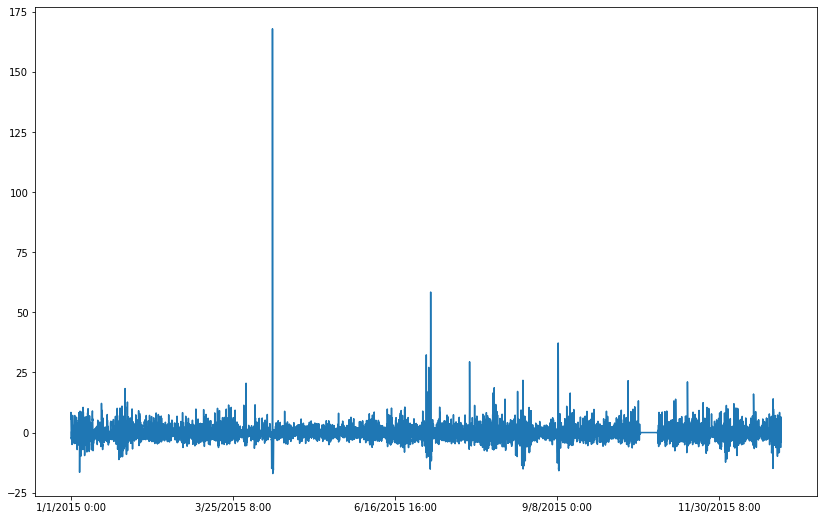

In [11]:
#(ii)-(b)Detrend the original series
trend = data['NP'].rolling(window=24, min_periods = 1, center=True).mean()
y = data['NP']-trend
y.plot(figsize=(14, 9))

[0.3610300925925926, -0.18418269230769235, -0.26460648148148147, -0.5623726851851851, -0.7258912037037036, -0.7470145697167756, -0.15436342592592595, 0.5248410087719297, 0.5826435185185185, 0.7535185185185185, 0.32511258417508415, -0.16187047101449273, -0.37074074074074065, -0.7440740740740741, -0.7499652777777778, -0.3866203703703704, -0.6959837962962964, -1.0070949074074074, -0.5409259259259259, 0.15222222222222215, 0.6279861111111111, 1.4379976851851852, 1.5449074074074074, 1.006539351851852]


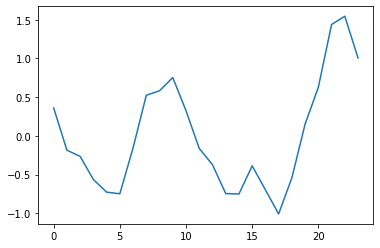

In [29]:
import numpy as np
import matplotlib.pyplot as plt
#(iii)-(c) Compute S and plot it
    
S = [np.mean([y[k+(i*24)] for i in range(360)]) for k in range(24)]
print(S)
plt.plot(S)

<AxesSubplot: >

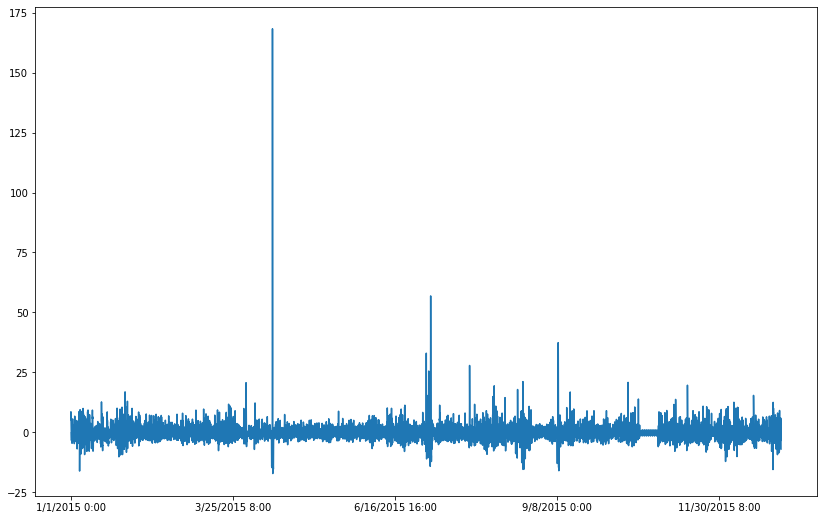

In [38]:
sk = np.tile(S, 364)
sk = np.concatenate((sk, S))
R = y-sk
R.plot(figsize=(14, 9))

In [46]:
se = pd.Series(S)
data['mean'] = se.values

ValueError: Length of values (24) does not match length of index (8)

In [37]:
import pandas as pd
data = pd.read_csv("star_stats.csv")
data

,"<!DOCTYPE HTML PUBLIC ""-//IETF//DTD HTML 2.0//EN"">"
0,<html><head>
1,<title>302 Found</title>
2,</head><body>
3,<h1>Found</h1>
4,"<p>The document has moved <a href=""https://air..."
5,<hr>
6,<address>Apache Server at www.airmonitoring.ut...
7,</body></html>


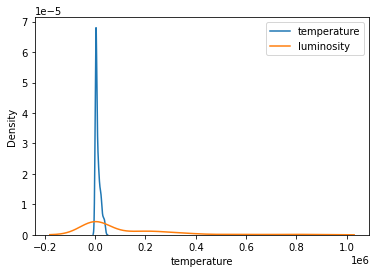

In [83]:
import seaborn
seaborn.kdeplot(data['1y'], label="luminosity")
# seaborn.kdeplot(data['radius'], label = 'radius')
# seaborn.kdeplot(data['absolute_magnitude'], label = 'absolute_magnitude')
plt.legend()

-0.6087282328465596


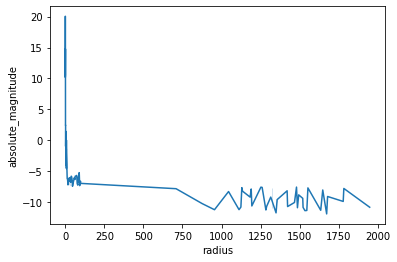

In [46]:
seaborn.lineplot(data=data, x="radius", y="absolute_magnitude")
print(data['absolute_magnitude'].corr(data['radius']))

In [36]:
data.groupby(['spectral_class']).min()

,temperature,luminosity,radius,absolute_magnitude,star_color,star_type
spectral_class,,,,,,
A,7723,0.000140,0.00878,-11.23,Blue White,Hyper Giant
B,9700,0.000590,0.00840,-9.90,Blue,Hyper Giant
F,5300,0.000080,0.00892,-0.98,Pale yellow orange,Main Sequence
G,6850,229000.000000,1467.00000,-10.07,Red,Hyper Giant
K,4015,0.085000,0.79500,-11.39,Orange,Hyper Giant
M,1939,0.000138,0.05700,-11.92,Orange,Brown Dwarf
O,5752,112000.000000,6.23700,-10.84,Blue,Hyper Giant


In [37]:
data.groupby(['spectral_class']).max()

,temperature,luminosity,radius,absolute_magnitude,star_color,star_type
spectral_class,,,,,,
A,14060,537493.00,1423.00,14.870,white,White Dwarf
B,33750,849420.00,1779.00,13.670,Whitish,White Dwarf
F,14732,9.25,1.93,14.470,yellow-white,White Dwarf
G,6850,229000.00,1467.00,-10.070,Red,Hyper Giant
K,5112,630000.00,1534.00,6.506,yellowish,Main Sequence
M,3834,550000.00,1673.00,20.060,Red,Super Giant
O,40000,834042.00,1948.50,-4.360,Blue,Super Giant


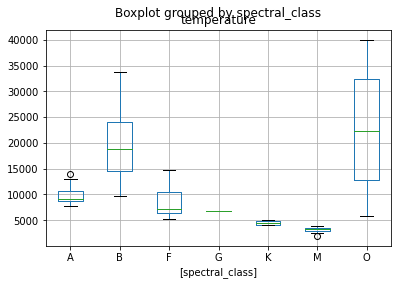

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
data[['temperature', 'spectral_class']].boxplot(by='spectral_class')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
data['Decade'] = pd.cut(data.time, bins=6)
data[['Decade', 'value']].boxplot(by='Decade')
plt.xticks(range(7), [str(x) for x in range(1910, 1980, 10)])
plt.xticks(ha='left')
plt.title('Temperature Over the Decades')
plt.suptitle('')
plt.xlabel('Decade')
plt.ylabel('Average Yearly Temperature (F)')
plt.show()

0.06421597240596892


<AxesSubplot: xlabel='temperature', ylabel='radius'>

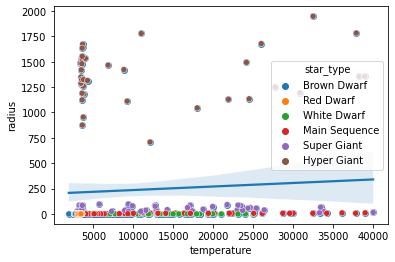

In [93]:
import seaborn
# Make the plot for the data visualization and line of best fit here:
seaborn.regplot(x='temperature', y = 'radius', data = data)
print(data['temperature'].corr(data['radius']))
seaborn.scatterplot(data=data, x='temperature', y='radius', hue='star_type')

0.5265157243480015


<AxesSubplot: xlabel='luminosity', ylabel='radius'>

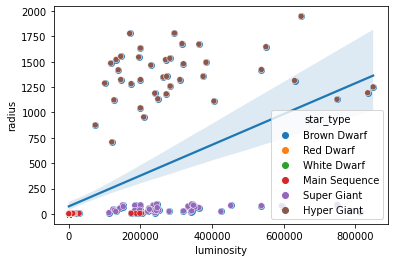

In [94]:
import seaborn
# Make the plot for the data visualization and line of best fit here:
seaborn.regplot(x='luminosity', y = 'radius', data = data)
print(data['luminosity'].corr(data['radius']))
seaborn.scatterplot(data=data, x='luminosity', y='radius', hue='star_type')

-0.6087282328465596


<AxesSubplot: xlabel='absolute_magnitude', ylabel='radius'>

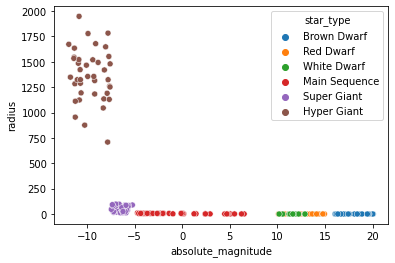

In [95]:
import seaborn
# Make the plot for the data visualization and line of best fit here:
# seaborn.regplot(x='absolute_magnitude', y = 'radius', data = data)
print(data['absolute_magnitude'].corr(data['radius']))
seaborn.scatterplot(data=data, x='absolute_magnitude', y='radius', hue='star_type')

-0.692619233399942


<AxesSubplot: xlabel='absolute_magnitude', ylabel='luminosity'>

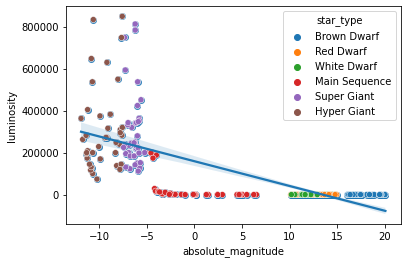

In [96]:
import seaborn
# Make the plot for the data visualization and line of best fit here:
seaborn.regplot(x='absolute_magnitude', y = 'luminosity', data = data)
print(data['absolute_magnitude'].corr(data['luminosity']))
seaborn.scatterplot(data=data, x='absolute_magnitude', y='luminosity', hue='star_type')

-0.42026054236947274


<AxesSubplot: xlabel='absolute_magnitude', ylabel='temperature'>

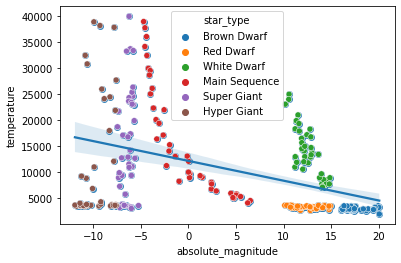

In [97]:
import seaborn
# Make the plot for the data visualization and line of best fit here:
seaborn.regplot(x='absolute_magnitude', y = 'temperature', data = data)
print(data['absolute_magnitude'].corr(data['temperature']))
seaborn.scatterplot(data=data, x='absolute_magnitude', y='temperature', hue='star_type')

In [43]:
data.groupby(['star_color']).mean()
data.groupby(['luminosity']).mean()

/var/folders/j1/rssdx9h148g0ptj4pj02c_0m0000gn/T/ipykernel_11886/2019882780.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['star_color']).mean()
/var/folders/j1/rssdx9h148g0ptj4pj02c_0m0000gn/T/ipykernel_11886/2019882780.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['luminosity']).mean()


,temperature,radius,absolute_magnitude
luminosity,,,
0.000080,7230.000000,0.01300,14.080
0.000085,12990.000000,0.00984,12.230
0.000110,11216.000000,0.01086,13.680
0.000138,1939.000000,0.10300,20.060
0.000140,7077.333333,0.04466,15.240
...,...,...,...
748890.000000,21738.000000,92.00000,-7.346
783930.000000,10930.000000,25.00000,-6.224
813000.000000,40000.000000,14.00000,-6.230


In [86]:
print(data['temperature'].mean())

10497.4625


In [88]:
print(data['luminosity'].mean())

107188.36163460833


In [90]:
print(data['radius'].var())

267450.08362078236


In [92]:
print(data['absolute_magnitude'].var())

110.93381641588215


<AxesSubplot: xlabel='temperature', ylabel='Density'>

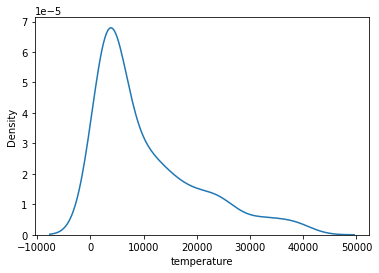

In [85]:
import seaborn
seaborn.kdeplot(data['temperature'], label="temperature")

<AxesSubplot: xlabel='luminosity', ylabel='Density'>

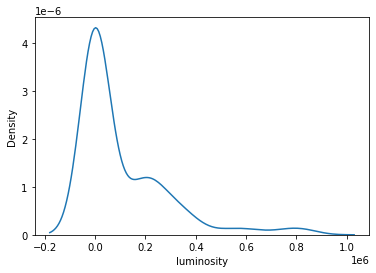

In [87]:
import seaborn
seaborn.kdeplot(data['luminosity'])

<AxesSubplot: xlabel='radius', ylabel='Density'>

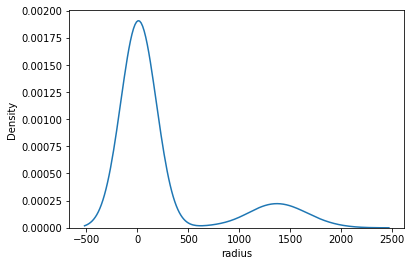

In [89]:
import seaborn
seaborn.kdeplot(data['radius'])

<AxesSubplot: xlabel='absolute_magnitude', ylabel='Density'>

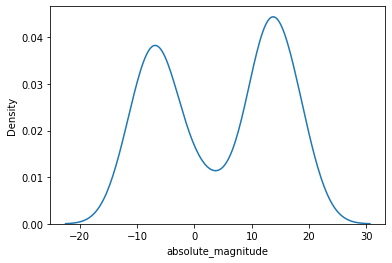

In [91]:
import seaborn
seaborn.kdeplot(data['absolute_magnitude'])

In [29]:
data.groupby(['star_type']).max()

,temperature,luminosity,radius,absolute_magnitude,star_color,spectral_class
star_type,,,,,,
Brown Dwarf,3531,0.0056,0.190,20.060,Red,M
Hyper Giant,38940,849420.0000,1948.500,-7.580,White,O
Main Sequence,39000,204000.0000,10.600,6.506,yellowish,O
Red Dwarf,3692,0.0390,0.730,14.940,Red,M
Super Giant,40000,813000.0000,98.000,-5.240,Red,O
White Dwarf,25000,0.0560,0.015,14.870,white,F


In [84]:
data.groupby(['star_type']).min()

,temperature,luminosity,radius,absolute_magnitude,star_color,spectral_class
star_type,,,,,,
Brown Dwarf,1939,0.000138,0.0570,16.05,Red,M
Hyper Giant,3399,74000.000000,708.9000,-11.92,Blue,A
Main Sequence,4077,0.085000,0.7950,-4.70,Blue,A
Red Dwarf,2621,0.000190,0.0980,10.12,Red,M
Super Giant,3008,112000.000000,12.0000,-7.45,Blue,B
White Dwarf,7100,0.000080,0.0084,10.18,Blue,A


In [6]:
data.groupby(['radius']).var()

/var/folders/j1/rssdx9h148g0ptj4pj02c_0m0000gn/T/ipykernel_1054/3851558704.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['radius']).var()


,temperature,luminosity,absolute_magnitude
radius,,,
0.00840,NaN,NaN,NaN
0.00870,NaN,NaN,NaN
0.00878,NaN,NaN,NaN
0.00879,NaN,NaN,NaN
0.00890,NaN,NaN,NaN
...,...,...,...
1673.00000,NaN,NaN,NaN
1679.00000,NaN,NaN,NaN
1779.00000,NaN,NaN,NaN


In [30]:
data.groupby(['star_type']).min()

,temperature,luminosity,radius,absolute_magnitude,star_color,spectral_class
star_type,,,,,,
Brown Dwarf,1939,0.000138,0.0570,16.05,Red,M
Hyper Giant,3399,74000.000000,708.9000,-11.92,Blue,A
Main Sequence,4077,0.085000,0.7950,-4.70,Blue,A
Red Dwarf,2621,0.000190,0.0980,10.12,Red,M
Super Giant,3008,112000.000000,12.0000,-7.45,Blue,B
White Dwarf,7100,0.000080,0.0084,10.18,Blue,A


In [11]:
#Enter the code for the question above here:
#read in the costs.csv file
data = pd.read_csv("costs.csv")
#add a column called, "girlfriend with all values set to 500"
girlfriend = np.array([500, 500, 500, 500, 500, 500])
data['girlfriend'] = girlfriend
#reindex the columns such that the amount spent on rent is the first column and the other columns stay in the same order
new_col = ['rent', 'books', 'food', 'fortnite_skins', 'girlfriend']
data = data[new_col]
#Sort the dataframe in descending order based on how much I psent on fortnite_skins
data = data.sort_values(by='fortnite_skins', ascending=False)
#Reset all the values in teh retn scolumn to 1000
data['rent'] = np.array([1000,1000,1000,1000,1000,1000])
data

ParserError: Error tokenizing data. C error: Expected 1 fields in line 27, saw 367


## Exercise 4: Means on Columns
Calculate the mean cost of each column in the costs DataFrame in the cell below. (Hint: use the DataFrame.mean() function!)

In [17]:
#Mean cost of each column
print(data.mean())

rent              1000.000000
books              287.833333
food               772.833333
fortnite_skins      17.333333
girlfriend         500.000000
dtype: float64


## Exercise 5: Supplements

Now we will return to the grades DataFrame that we created earlier.

Dealing with missing data is a difficult topic in data science. The pandas default for missing values is NaN. These can be difficult to deal with because any operation (addition, multiplication, etc) involving an NaN value will always result in an NaN, so finding the mean of a column or adding up all the rows will be meaningless.

What do we do with NaN values? The answer is always: it depends, but we should also ask: why do we have missing values? It could be that some people only filled out half the survey, it could be that the data should read 0.0 but it wasn't filled out. It could mean (in our example) that the student isn't enrolled in that class. It could be many reasons, and we should always figure them out first!

In pandas we can do a couple things with NaN values.

To drop all rows containing NaN values, we can simply call DataFrame.dropna()


Or we could fill the NaN values with a specified value, like 0.0:

In [18]:
grades.fillna(0.0)

,Math,English,History
Barbara,52.0,73.0,100
David,10.0,39.0,100
Eleanor,35.0,0.0,100
Greg,0.0,26.0,100
Lauren,0.0,99.0,100
Mark,81.0,68.0,100


The supplements.csv downloaded below contains vitamin information (in mg) for 20 different supplements I'm considering as I get ready for summer:
* Read in the supplements.csv file
* Fill all the na values using method='bfill' (HINT: put method='bfill' in the function call! Google it if you're confused)
* Sort the DataFrame by my most important vitamin, vitamin b6, in descending order
* Use .drop() to create a new df, subset_df, containing all the vitamins in the supplements file except vitamin_d
* Create a boxplot of all columns in subset_df (hint - make sure to call plt.show() at the end!!)

In [19]:
!curl -o supplements.csv https://raw.githubusercontent.com/wingated/cs180_labs/main/supplements.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   358  100   358    0     0   1484      0 --:--:-- --:--:-- --:--:--  1479


    vitamin_c  vitamin_d  vitamin_e  vitamin_k  vitamin_b6
0         NaN      547.0       21.0       25.0         6.0
1        65.0      744.0       21.0       25.0         6.0
2        71.0      664.0       22.0       30.0         NaN
3        49.0      506.0       20.0       37.0         9.0
4        43.0      520.0       24.0       23.0         0.0
5        69.0      417.0       24.0       38.0         8.0
6        51.0      556.0       20.0        NaN         5.0
7        59.0      768.0       24.0       31.0         8.0
8        69.0      439.0       24.0       37.0         1.0
9        59.0      476.0       20.0       32.0         9.0
10       65.0      585.0       24.0       18.0         8.0
11       80.0      516.0       23.0       30.0         7.0
12       59.0      591.0       23.0       30.0         3.0
13       60.0      549.0       22.0       32.0         0.0
14       80.0        NaN        NaN       38.0        10.0
15       77.0      790.0       23.0       23.0        10

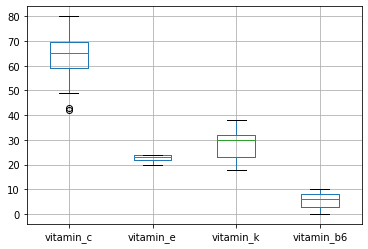

In [34]:
#Enter the code for the question above here:
#read in the supplements.csv file
data = pd.read_csv("supplements.csv")
#Fill all the na values using method='bfill' (HINT: put method='bfill' in the function call! Google it if you're confused)
data = data.fillna(method='bfill')
#Sort the DataFrame by my most important vitamin, vitamin b6, in descending order
data = data.sort_values(by='vitamin_b6', ascending = False)
#Use .drop() to create a new df, subset_df, containing all the vitamins in the supplements file except vitamin_d
sub_data = data.drop(columns = ['vitamin_d'])
# Create a boxplot of all columns in subset_df (hint - make sure to call plt.show() at the end!!)
boxplot = sub_data.boxplot()

## Exercise 6
Write something that you noticed in the supplements data. Feel free to poke around, plot some more things, and find something interesting!

In [1]:
# Exploratory Data Analysis
print("I found out that vitamin_c has more number than other vitamins")

I found out that vitamin_c has more number than other vitamins


Enter something cool that you found out here.